In [15]:
import models as md
import cleaning as cn
import visuals as vs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 90)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading and Exploration

In [2]:
#DO VISUALS ON UNDUMMIED DATA
df = pd.read_csv('credit_messy.csv')
#df_no_dummies = pd.read_csv('')

In [3]:
df.head()

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,RepayStatApr,RepayStatMay,RepayStatJun,RepayStatJul,RepayStatAug,RepayStatSep,BillSep,BillAug,BillJul,BillJun,BillMay,BillApr,PaymentSep,PaymentAug,PaymentJul,PaymentJun,PaymentMay,PaymentApr,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = md.XySplit(df)

In [5]:
md.stats(df)

Average Credit Limit: $ 167484.32
Average Chance of Default:  22.12 %


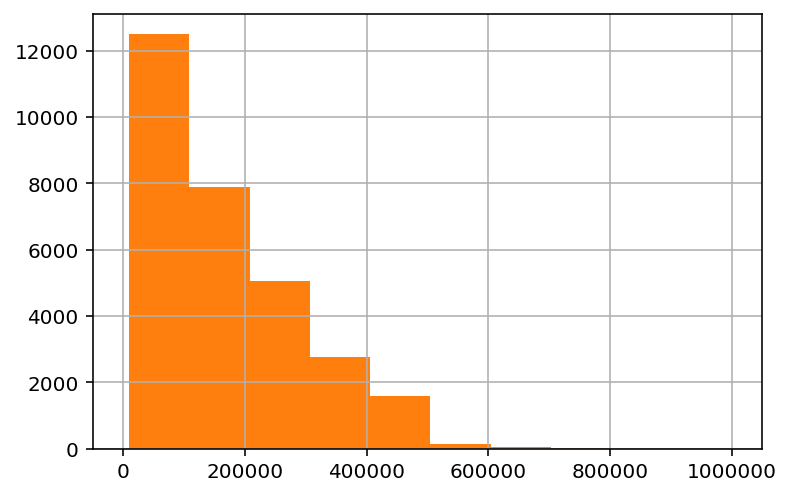

In [6]:
vs.hists(df,'Age'),
vs.hists(df, 'CreditLimit')

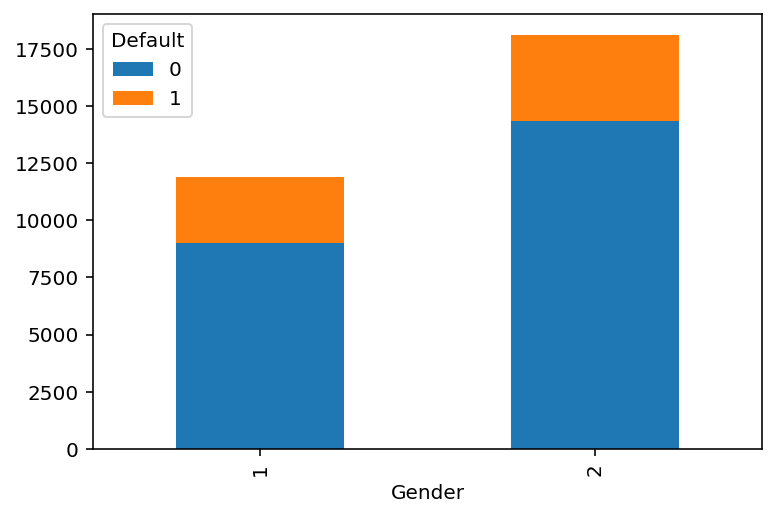

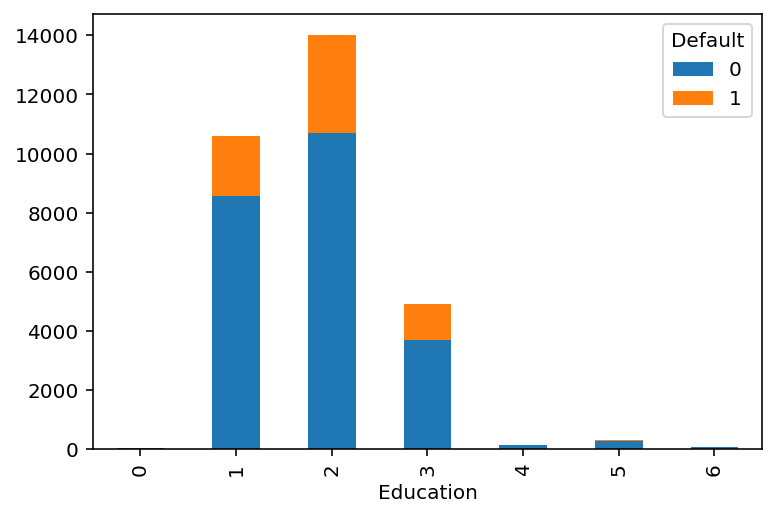

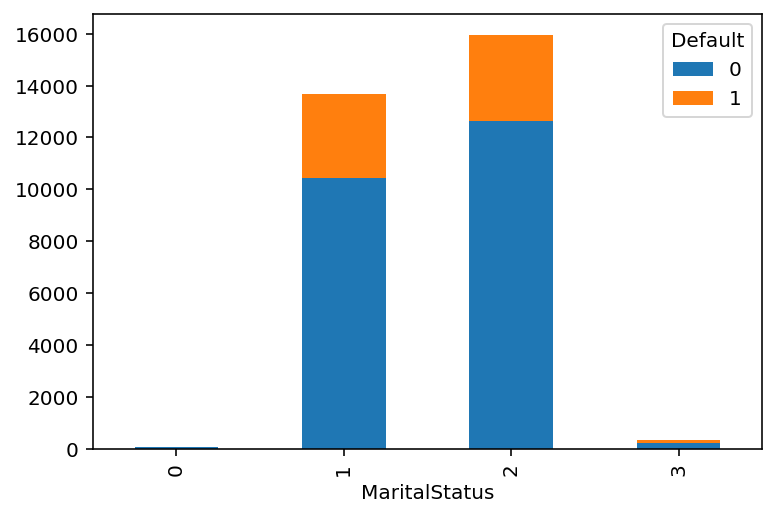

In [7]:
vs.bars(df,'Gender')
vs.bars(df,'Education')
vs.bars(df,'MaritalStatus')

# Baseline Model

We built a basic Decision Tree as our baseline model.

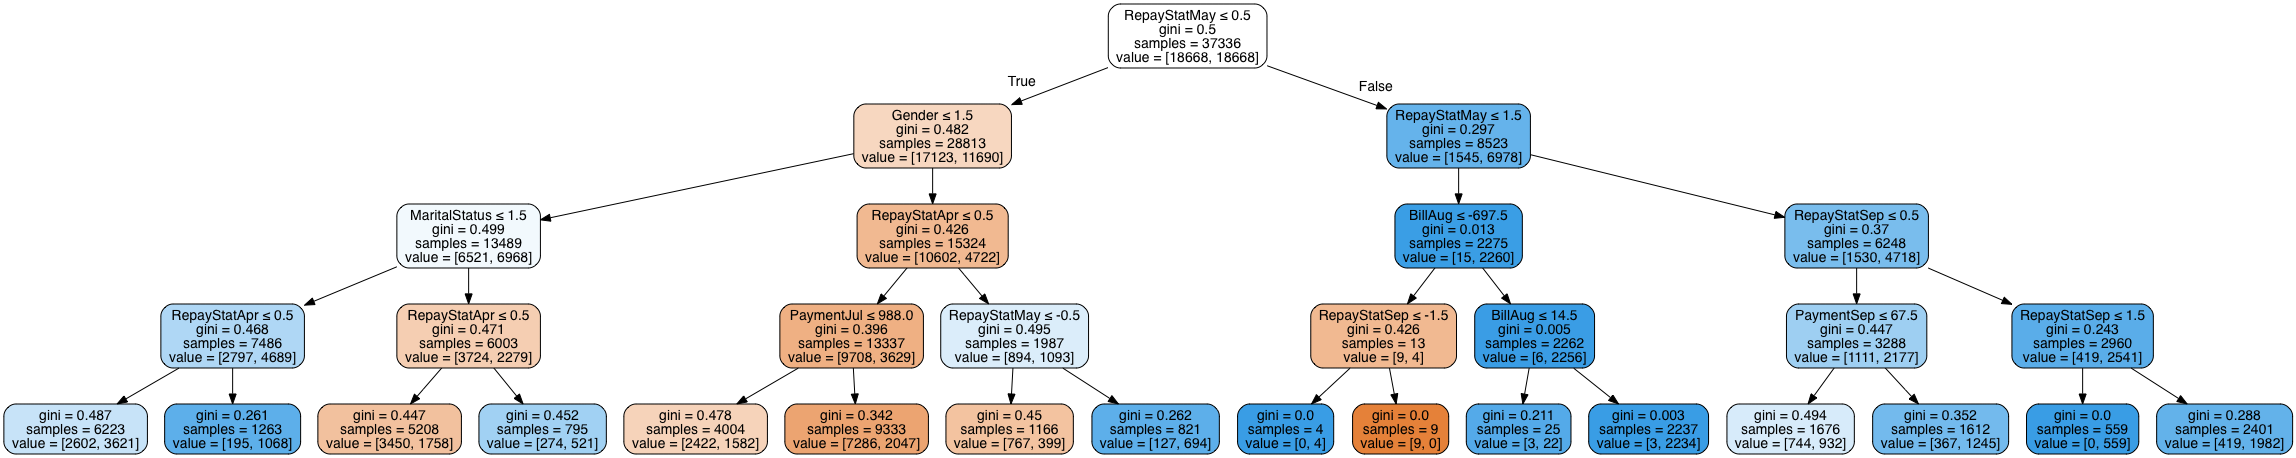

In [10]:
vs.PlotDecisionTree(X_train, X_test, y_train, y_test)

Training Accuracy for Decision Tree Classifier: 100.0%
Testing Accuracy for Decision Tree Classifier: 71.25%


Confusion Matrix 

Predicted     0     1   All
True                       
0          3463  1233  4696
1          1467  3229  4696
All        4930  4462  9392
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.70      0.74      0.72      4696
           1       0.72      0.69      0.71      4696

    accuracy                           0.71      9392
   macro avg       0.71      0.71      0.71      9392
weighted avg       0.71      0.71      0.71      9392



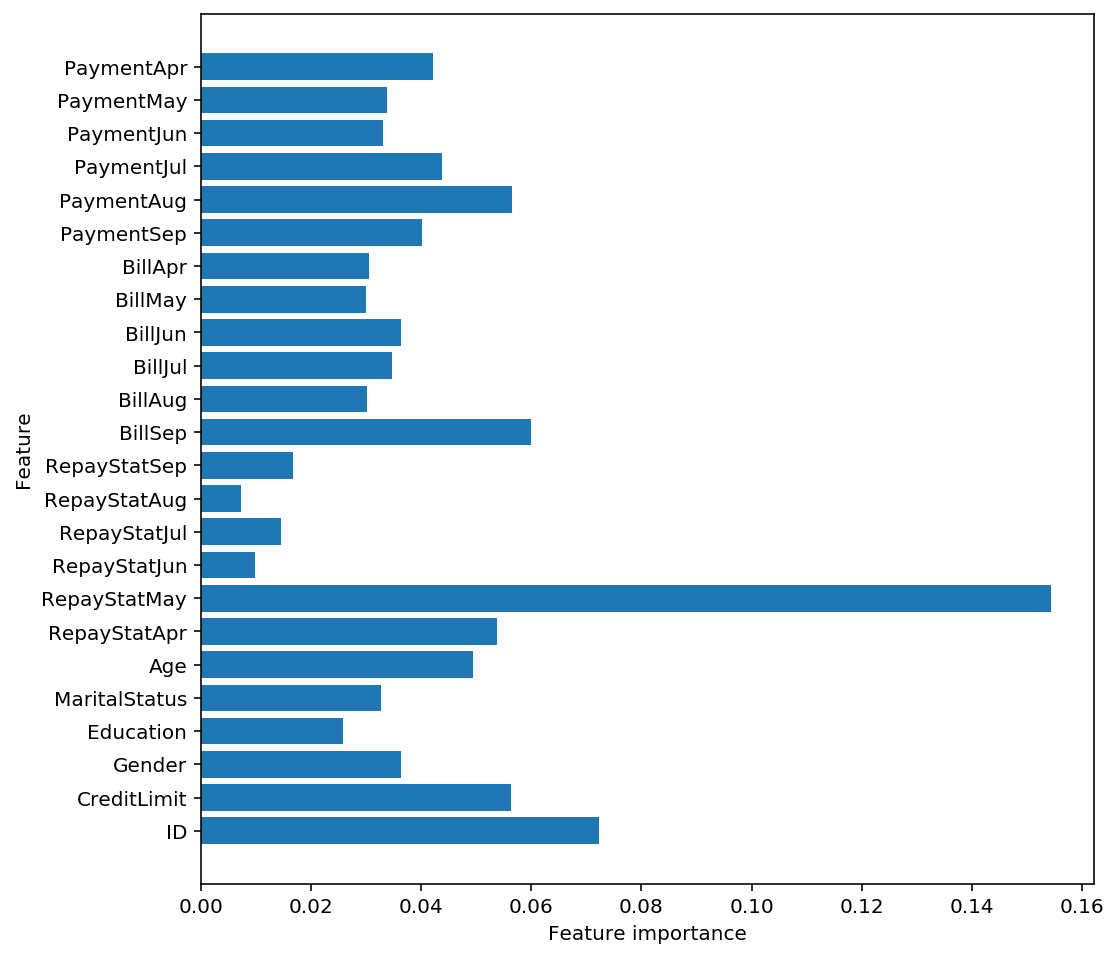

In [11]:
md.DecisionTree(X_train, X_test, y_train, y_test)

---------
AUC Score: 0.7125212947189097
---------


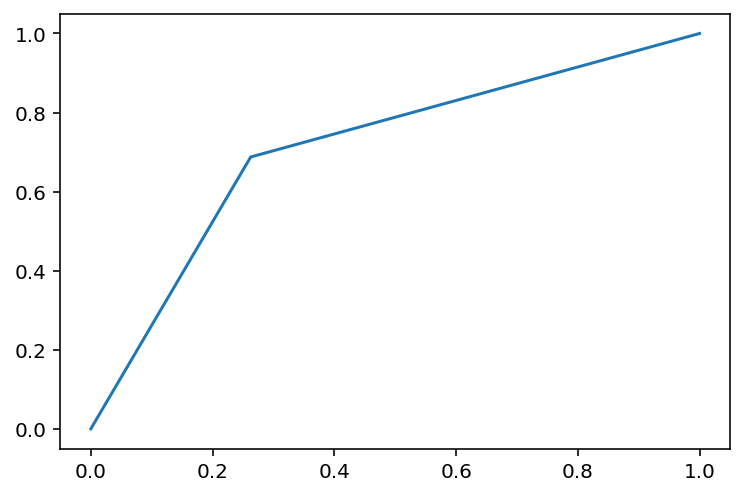

In [13]:
# COME BACK TO THIS
vs.PlotRocCurve(X_train, X_test, y_train, y_test, DecisionTreeClassifier)

# Random Forest

We next built a Random Forest, and optimised the model for * . Our Grid Search found that our optimal parameters were * . We iterated through these, using both Gini and Entropy selection criteria, although we ultimately settled on using * .

In [ ]:
md.OptimiseForest(X_train, X_test, y_train, y_test)

In [ ]:
md.RandomForest(X_train, X_test, y_train, y_test, criterion = 'gini', 
                max_depth = 1, max_features = 1, n_estimators = 1)

# Bagged Tree

After building a Random Forrest Model, we decided to build a Bagged Decision tree. They use similar methods, except in Random forests, only a subset of features are selected at random out of the total, whereas bagging allows for all features to be considered for the best split.

We then optimised our Baseline Bagged Model, using Grid Search to find optimal parameters. We ran various iterations of the learner, with different values for * .

Our Grid Search showed that increasing the number of features would improve our model
but we decided that * would be the maximum number of features we would use, as to avoid overfitting. 

We then input the most effective parameters for our final Bagged Decision Tree Model. 

In [17]:
md.OptimiseBagging(X_train, X_test, y_train, y_test)

{'max_features': 18, 'n_estimators': 11}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,3.950370,0.151195,0.040654,0.002510,18,11,"{'max_features': 18, 'n_estimators': 11}",0.634880,0.783671,0.870263,0.873826,0.869700,0.806468,0.092269,1
10,3.021765,0.098825,0.038225,0.004162,14,11,"{'max_features': 14, 'n_estimators': 11}",0.630997,0.794739,0.869576,0.869003,0.864214,0.805706,0.091818,2
16,3.219028,0.079097,0.037517,0.002445,15,11,"{'max_features': 15, 'n_estimators': 11}",0.619226,0.796041,0.870658,0.878683,0.862171,0.805356,0.097571,3
22,3.489846,0.189566,0.041408,0.002234,16,11,"{'max_features': 16, 'n_estimators': 11}",0.627649,0.792934,0.867739,0.873239,0.864335,0.805179,0.093501,4
28,3.673684,0.133501,0.037145,0.002096,17,11,"{'max_features': 17, 'n_estimators': 11}",0.624023,0.791203,0.869880,0.872629,0.863263,0.804200,0.094992,5
32,3.178593,0.110385,0.034143,0.003546,18,9,"{'max_features': 18, 'n_estimators': 9}",0.630062,0.791736,0.863782,0.865594,0.861043,0.802444,0.090570,6


Confusion Matrix 

Predicted     0     1   All
True                       
0          3925   771  4696
1          1331  3365  4696
All        5256  4136  9392
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4696
           1       0.81      0.72      0.76      4696

    accuracy                           0.78      9392
   macro avg       0.78      0.78      0.78      9392
weighted avg       0.78      0.78      0.78      9392

Training Accuracy for Bagging Tree Classifier: 99.53%
Testing Accuracy for Bagging Tree Classifier: 77.62%


---------
AUC Score: 0.8475980590970169
---------


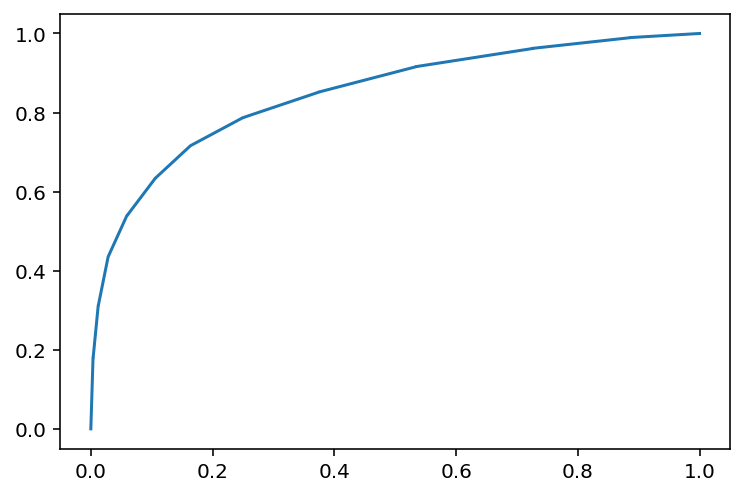

In [27]:
md.BaggedTree(X_train, X_test, y_train, y_test, n_estimators_ = 11, max_features_ = 18)

### Support Vector Machine


Following the result of the random forest we decided to look into SVM classifier to see if it would provide a better result

In [ ]:
df = pd.read_csv('allthedummies.csv') # We import all our dummy variables from the clean 

# K Nearest Neighbors

In [ ]:
md.OptimiseKNN(X_train, X_test, y_train, y_test)

In [ ]:
md.KNN(X_train, X_test, y_train, y_test, n_neighbors_=11, leaf_size_=5)

# Logistic Regression

Finally, we built a Logistic Regression Model.

We were unable to optimise for the normalization method used with Grid Search, as some methods are only compatible with specific solvers. This could have been rectified by using a pipeline to run our iterations of the model, but time contraints didn't allow for this.

We also tested various values for C, between 0.25 and 50, but they ultimately added no improvement to our model's score, and so we have ommitted the parameter from our final model.


In [ ]:
md.OptimiseLogReg(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
md.LogRegression(X_train_scaled, X_test_scaled, y_train, y_test, max_iter_ = 75)

In [ ]:
# Create the pipeline
pipe = Pipeline([('rf', RandomForestClassifier(random_state=123)),
                ])

# Create the grid parameter
grid = [{'criterion': ['gini','entropy'],
        'max_depth' : [5,7,9,11],
        'max_features' : [5,7,9,11],
        'n_estimators' : [8,10,12,14]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring=scorer,
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

# RandomForestClassifier.get_params(RandomForestClassifier()).keys()

In [ ]:
gs_rf.best_params_